# Detect fake profiles in online social networks using Kmeans cluster

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
td = pd.read_csv('data/srm csv/users.csv')
td.head(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [3]:
ttd = pd.read_csv('data/srm csv/fusers.csv')
ttd.head(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [4]:
td.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [5]:
ttd.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train=td.drop(columns=['dataset','id'])
y_train=td['dataset']

In [8]:
X_test=ttd.drop(columns=['id'])

In [9]:
y_train.value_counts()

E13    1481
Name: dataset, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=40)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

In [12]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=2.0,random_state=101)

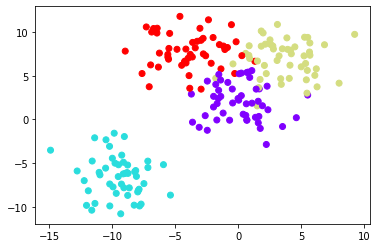

In [13]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [14]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [15]:
from sklearn.cluster import KMeans

In [16]:
Kmeans = KMeans(n_clusters=9)

In [17]:
Kmeans.fit(data[0])
Kmeans.cluster_centers_
Kmeans.labels_

array([8, 2, 7, 6, 6, 3, 6, 7, 1, 7, 8, 7, 6, 1, 8, 5, 2, 5, 3, 4, 3, 5,
       1, 0, 8, 0, 0, 5, 6, 2, 4, 0, 2, 5, 7, 8, 3, 3, 0, 5, 3, 4, 4, 4,
       5, 1, 4, 1, 0, 7, 5, 8, 2, 5, 3, 1, 1, 5, 7, 6, 0, 1, 3, 4, 6, 5,
       3, 2, 6, 3, 6, 1, 3, 7, 3, 2, 6, 5, 8, 7, 7, 3, 6, 3, 5, 5, 5, 8,
       1, 3, 0, 3, 3, 1, 1, 0, 6, 8, 3, 2, 7, 3, 1, 5, 1, 7, 3, 6, 0, 3,
       2, 4, 8, 6, 0, 2, 4, 8, 1, 4, 1, 8, 7, 8, 5, 2, 8, 5, 0, 4, 8, 4,
       5, 0, 3, 8, 2, 7, 6, 5, 0, 2, 3, 4, 4, 1, 7, 0, 4, 8, 4, 4, 5, 2,
       5, 8, 1, 6, 6, 5, 6, 5, 7, 8, 3, 8, 7, 6, 4, 2, 6, 5, 8, 1, 1, 8,
       6, 1, 0, 1, 4, 0, 0, 4, 3, 0, 3, 0, 0, 5, 3, 6, 6, 4, 3, 1, 6, 6,
       3, 5], dtype=int32)

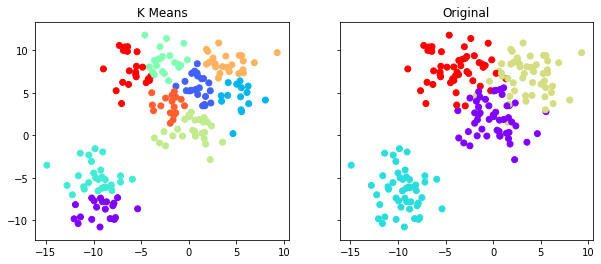

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=Kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c = data[1],cmap='rainbow')
